In [138]:
import numpy as np
np.random.seed(1337)
import pandas as pd
import keras
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier

In [116]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='accuracy',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    '''# Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

In [111]:
def nn_tuning(X_train, y_train, X_test, y_test, title):
    #create new a knn model
    nn = MLPClassifier()

    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'hidden_layer_sizes': [(16, 2), (16, 16, 16, 16, 2),
                                        (32, 2), (32, 32, 32, 32, 2),
                                        (128, 2), (128, 128, 128, 128, 2),
                                        (512, 2), (512, 512, 32, 32, 2)],  # , 
                  'activation': ['logistic', 'relu'],
                  'solver': ['sgd', 'adam'],
                  'max_iter': [10000]}
    nn_gscv = GridSearchCV(nn, param_grid, cv=5) #fit model to data
    nn_gscv.fit(X_train, y_train)

    #check top performing n_neighbors value
    print(nn_gscv.best_params_)

    #check mean score for the top performing value of n_neighbors
    print(nn_gscv.best_score_)
    
    try:
        plot_roc_curve(nn_gscv, X_test, y_test)  # doctest: +SKIP
        plt.title(title)
        plt.show() 
    except:
        pass
    
    return nn_gscv

https://scikit-learn.org/stable/modules/sgd.html
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [86]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1]


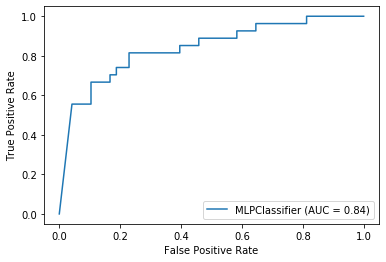

In [108]:
clf = MLPClassifier(hidden_layer_sizes=(32,2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='adam')
clf.fit(X_train, y_train)
scores = clf.predict(X_test)
print(scores)
metrics.plot_roc_curve(clf, X_test, y_test)

In [112]:
model = nn_tuning(X_train, y_train, X_test, 
                   y_test, 'Neural Network Accuracy Normalized Data')

{'activation': 'relu', 'hidden_layer_sizes': (128, 2), 'max_iter': 10000, 'solver': 'sgd'}
0.8127272727272727


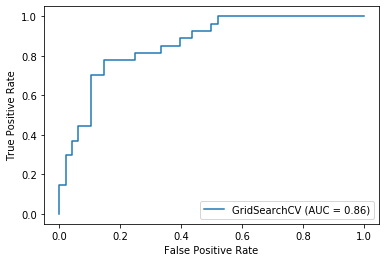

In [113]:
metrics.plot_roc_curve(model, X_test, y_test)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

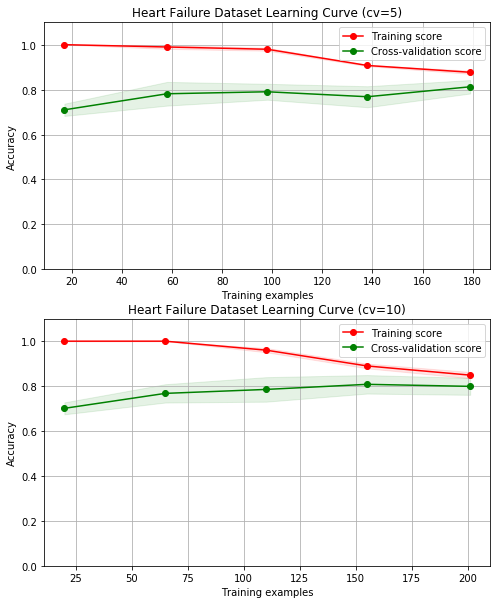

In [117]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(MLPClassifier(hidden_layer_sizes=(128, 2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='sgd'), 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(MLPClassifier(hidden_layer_sizes=(128, 2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='sgd'), 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

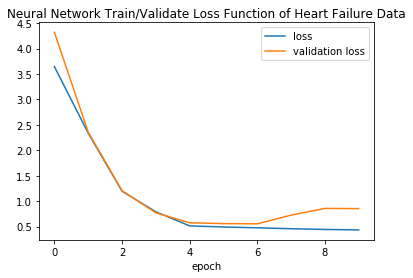

In [133]:
input_shape = len(X.columns) 
model = keras.Sequential()
model.add(Dense(input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='Adam')
history = model.fit(X_train, y_train.values, 
                    validation_data=(X_test, y_test.values), epochs=10, verbose=0)

x = np.arange(10)
plt.xlabel('epoch')
plt.title('Neural Network Train/Validate Loss Function of Heart Failure Data')
plt.plot(x, history.history['loss'], label='loss')
plt.plot(x, history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [149]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Handle Categorical features
clfs = {c:preprocessing.LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}

for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])
    
#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#

X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [137]:
model = nn_tuning(X_train, y_train, X_test, 
                   y_test, 'Neural Network Accuracy Normalized Data')

{'activation': 'relu', 'hidden_layer_sizes': (16, 2), 'max_iter': 10000, 'solver': 'sgd'}
0.9343309507646846


0.9503308877395125

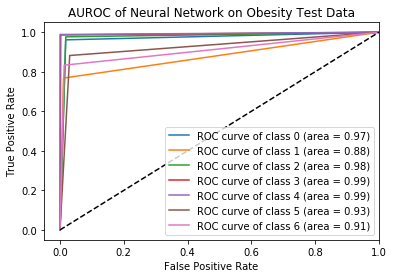

In [152]:
model = MLPClassifier(hidden_layer_sizes=(16, 2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='sgd')
model.fit(X_train, y_train)

y_train_bin = preprocessing.label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred = model.predict(X_test)

y_pred = preprocessing.label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.title('AUROC of Neural Network on Obesity Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

np.mean(list(roc_auc.values()))

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

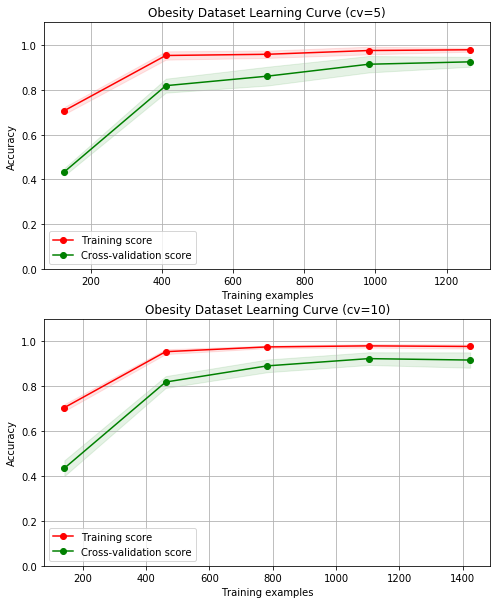

In [153]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(MLPClassifier(hidden_layer_sizes=(16, 2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='sgd'), 
                    'Obesity Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(MLPClassifier(hidden_layer_sizes=(16, 2), random_state=0, 
                    max_iter=10000, warm_start=True, activation='relu', solver='sgd'), 
                    'Obesity Dataset Learning Curve (cv=10)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

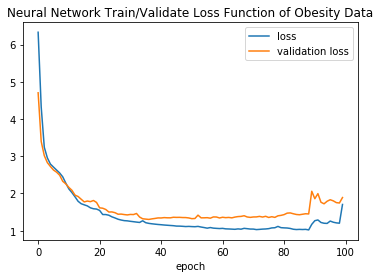

In [157]:
input_shape = len(X.columns) 
model = keras.Sequential()
model.add(Dense(input_shape, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='relu'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100, verbose=0)

x = np.arange(100)
plt.xlabel('epoch')
plt.title('Neural Network Train/Validate Loss Function of Obesity Data')
plt.plot(x, history.history['loss'], label='loss')
plt.plot(x, history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()